# Firmware Analysis

### Initializing a Data Source
- Locate a path containing files for analysis

In [1]:
from fw_pipeline.data_source import DataSource

data_path = '/Users/snichols/data/20200902'
ds = DataSource(data_path)

Extraction Setup
Container Setup


#### Inspect DataSource

In [3]:
ds

['/Users/snichols/data/20200902/MDF4__20200902_2032190__tag.mf4', '/Users/snichols/data/20200902/MDF4__20200902_2034190__tag.mf4', '/Users/snichols/data/20200902/MDF4__20200902_2035200__tag.mf4', '/Users/snichols/data/20200902/MDF4__20200902_2033190__tag.mf4']

In [5]:
# Any log format can be added, and can be simultaneously extracted
ds._info

filename  \
0  /Users/snichols/data/20200902/MDF4__20200902_2...   
1  /Users/snichols/data/20200902/MDF4__20200902_2...   
2  /Users/snichols/data/20200902/MDF4__20200902_2...   
3  /Users/snichols/data/20200902/MDF4__20200902_2...   

                                           extractor  
0  Delayed('mdf_extractor-0712b0ca-867a-42c4-84f1...  
1  Delayed('mdf_extractor-0712b0ca-867a-42c4-84f1...  
2  Delayed('mdf_extractor-0712b0ca-867a-42c4-84f1...  
3  Delayed('mdf_extractor-0712b0ca-867a-42c4-84f1...

#### Get a list of all signals

In [4]:
ds.all_signals[:5]

['UDS_CCC_requestData0',
 'UDS_CCC_requestData1',
 'UDS_CCC_requestData2',
 'UDS_CCC_requestData3',
 'UDS_CCC_requestData4']

#### Get a list of all buses

In [5]:
ds.all_buses

['AI',
 'BDY1',
 'BDY2',
 'BMS_CAN',
 'CHG_CAN',
 'DR1',
 'DR2',
 'DR3',
 'DR4',
 'EMU_BDY2',
 'EMU_DR3',
 'EMU_DR4',
 'GTC_CAN',
 'UI']

#### Get a list of signals extracted from each bus

In [6]:
ds.signals_on_bus('AI')[:5]

['ATX_canFlashDataByte0',
 'ATX_canFlashCommandByte0',
 'ATX_f000_reserved',
 'ATX_f001_can_error',
 'ATX_f002_efuse_fet_bad_fault']

#### Extract a specific signal

In [7]:
signal = ds.signal['EMU_MDI1_driverAlertLamp'].data
signal.head()

time
1.599079e+09    1
1.599079e+09    1
1.599079e+09    1
1.599079e+09    1
1.599079e+09    1
Name: EMU_MDI1_driverAlertLamp, dtype: uint8

#### Extract a specific signal from a bus

In [8]:
signal = ds.bus['AI']['EMU_MDI1_driverAlertLamp'].data
signal.head()

time
1.599079e+09    1
1.599079e+09    1
1.599079e+09    1
1.599079e+09    1
1.599079e+09    1
Name: EMU_MDI1_driverAlertLamp, dtype: uint8

#### Get all signals pertaining to an ECU

In [4]:
ds.ecu_signals('DCU1')[:10]

['UDS_DCU1_requestData0',
 'UDS_DCU1_requestData1',
 'UDS_DCU1_requestData2',
 'UDS_DCU1_requestData3',
 'UDS_DCU1_requestData4',
 'UDS_DCU1_requestData5',
 'UDS_DCU1_requestData6',
 'UDS_DCU1_requestData7',
 'DCU1_UDS_responseData0',
 'DCU1_UDS_responseData1']

#### Plot signal(s) of interest

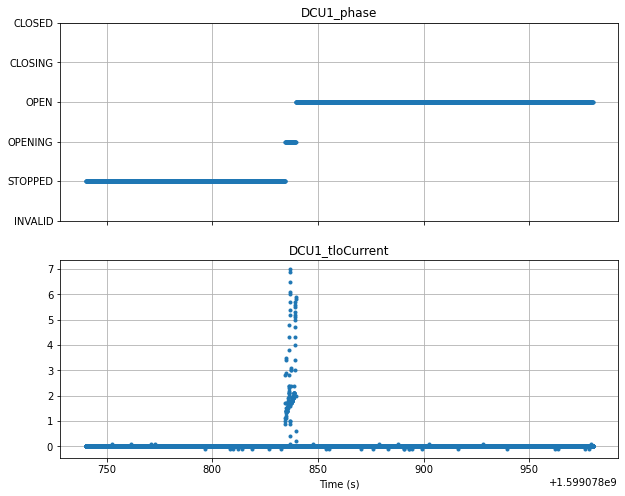

In [5]:
fig = ds.plot_signals(['DCU1_phase', 'DCU1_tloCurrent'])

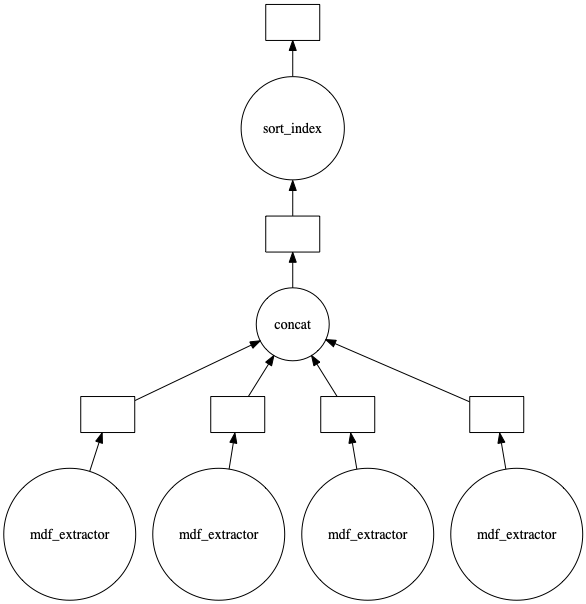

In [24]:
# Parallelization of extraction into common data format
ds.signal['EMU_ABD_brakingOutput']._delayed_data.visualize()